<a href="https://colab.research.google.com/github/Rathachai/rdfviz/blob/main/ex/rdfviz-examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RDF Visualization in Notebook : Examples**
> ## *Author* : [Rathachai CHAWUTHAI](https://rathachai.creatier.pro/) , Ph.D
> ### *Affiliation* : Computer Engineering, King Mongkut's Institute of Technology Ladkrabang (KMITL)
> #### *Updated Date* : 2023-12-07
---

> <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

---

## Citation

Please give a citation to:

> Chawuthai, R., & Takeda, H. (2016). Rdf graph visualization by interpreting linked data as knowledge. In Semantic Technology: 5th Joint International Conference, JIST 2015, Yichang, China, November 11-13, 2015, Revised Selected Papers 5 (pp. 23-39). Springer International Publishing.

## References


*   **RDFVIZ** : https://github.com/Rathachai/rdfviz
*   RDFlib : https://rdflib.readthedocs.io/
*   jQuery : https://jquery.com/
*   d3js : https://d3js.org/


---

## Import Libraries

In [ ]:
# install rdflib

!pip install -q rdflib

In [ ]:
# import semantic web nessessaries

import rdflib
from rdflib import URIRef, BNode, Literal
from rdflib import Namespace
from rdflib.namespace import DC, DCAT, DCTERMS, FOAF, OWL, PROF, RDF, RDFS, SKOS, TIME, XSD

In [ ]:
# import anythings for HTML displaying

import requests
from IPython.core.display import display, HTML

## Preparing

In [ ]:
# Create a Class

class RdfViz:
  def __init__(self, height=400, width=800, viz_template_url='https://rathachai.github.io/rdfviz/src/rdfd3-colab-v1.txt'):

    #set param
    self.height = str(height)
    self.width = str(width)

    # download rdfviz template from the github
    # rdf_viz_template_url = 'https://rathachai.github.io/rdfviz/src/rdfd3-colab-v1.txt' ### Default
    self.rdf_viz_template_text = requests.get(viz_template_url).text

  def display(self, graph):

    # check if rdfgraph --> convert to list
    gtype = type(graph)
    if gtype== rdflib.graph.Graph:
      graph = self.convert_rdf_to_list(graph)
      gtype = type(graph)

    # check if list --> convert to str
    if gtype==list:
      graph = self.convert_list_to_str(graph)
      gtype = type(graph)

    # check if str --> display
    if gtype==str:
      gviz = self.rdf_viz_template_text.replace('${TRIPLES}', graph).replace('${WIDTH}', str(self.width)).replace('${HEIGHT}', str(self.height))
      display(HTML(gviz))

  def convert_rdf_to_list(self, rdf_graph):
    # graph --> list
    return [(str(s), str(p), str(o)) for s, p, o in rdf_graph]

  def convert_list_to_str(self, triples_list):
    # list --> str
    return str([list(triple) for triple in triples_list])




In [ ]:
# Create an Object of RdfViz

gv = RdfViz()

---

## Usecase 1: RDF graph from the List of Tuples

In [ ]:
# RDF Graph from the list of tuples

triples_list =  [
    ("ex:Thailand", "ex:hasFood", "ex:TomYumKung"),
    ("ex:TomYumKung", "ex:isFoodOf", "ex:Thailand"),
    ("ex:TomYumKung", "rdf:type", 	"ex:SpicyFood"),
    ("ex:TomYumKung", "ex:includes", "ex:shrimp"),
    ("ex:TomYumKung", "ex:includes", "ex:chilly"),
    ("ex:TomYumKung", "ex:requires", "ex:chilly"),
    ("ex:TomYumKung", "ex:hasSpicy", "ex:chilly"),
    ("ex:TomYumKung", "ex:includes", "ex:lime"),
    ("ex:lime", "ex:hasTaste", "ex:sour"),
    ("ex:lime", "rdf:type", "ex:Vegetable"),
    ("ex:lime", "ex:popularIn", "ex:Thailand"),
    ("ex:SpicyFood", "ex:popularIn", "ex:Thailand"),
    ("ex:shrimp", "rdf:type", "ex:Animal"),
    ("ex:chilly", "ex:hasTaste", "ex:spicy"),
    ("ex:chilly", "rdf:type", "ex:Vegetable")
  ]



In [ ]:
# display graph

gv.display(triples_list)



> open in Colab to interact with this graph


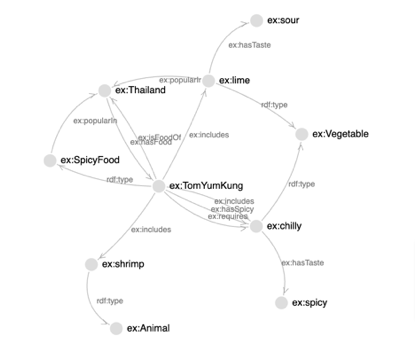

---

## Usecase 2: RDF Graph from TTL

In [ ]:
# RDF graph in the Turtle format

rdf_ttl_text = '''
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix pp: <http://example.org/people/> .

pp:bob a foaf:Person ;
    foaf:knows pp:linda, pp:mark ;
    foaf:name "Bob" .

pp:linda a foaf:Person ;
    foaf:name "Linda" .

pp:mark foaf:name "Mark" .
'''

In [ ]:
# Create a graph object

g = rdflib.Graph()
g.parse( data=rdf_ttl_text, format='turtle' )

<Graph identifier=N1aae3db155b3490c87bca409574dfbc4 (<class 'rdflib.graph.Graph'>)>

In [ ]:
# display graph

gv.display(g)

> open in Colab to interact with this graph

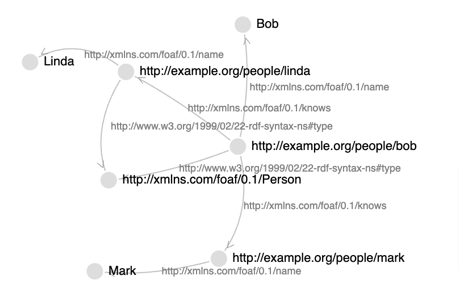

---

## Usecase 3: RDF Graph from LOD

In [ ]:
g = rdflib.Graph()
g.parse('http://www.w3.org/People/Berners-Lee/card')

<Graph identifier=Nf30647b922464d9eb310adbacbbbb45b (<class 'rdflib.graph.Graph'>)>

In [ ]:
# display graph

gv.width = 1000
gv.height = 800

gv.display(g)

> open in Colab to interact with this graph

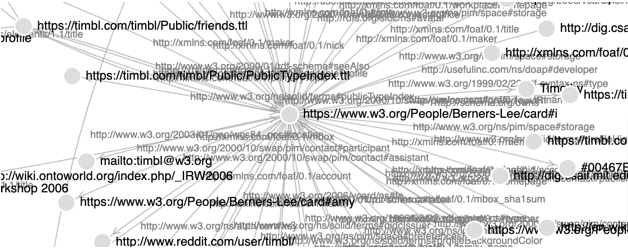

---
https://rathachai.creatier.pro/

## つづく